<a href="https://colab.research.google.com/github/Saivkumar/SaivKumar/blob/main/CO2_Emission_L1%26L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**L1 (Lasso) and L2 (Ridge) Regularization**

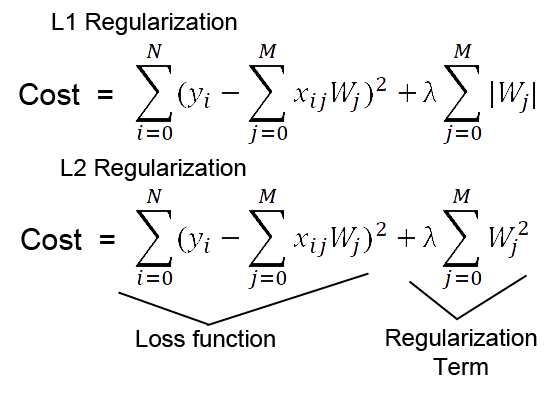

**Importing Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

**Loading the Dataset**

In [3]:
df = pd.read_csv('/content/CO2 emission of Cars.zip')

In [4]:
df

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN
5,VW,Up!,1000,929,105,NaN
6,Skoda,Fabia,1400,1109,90,NaN
7,Mercedes,A-Class,1500,1365,92,NaN
8,Ford,Fiesta,1500,1112,98,NaN
9,Audi,A1,1600,1150,99,NaN


Above dataset is about predicting Carbon Emission in Cars based on type of car and model,wight and volume.

**Pre- Processing Dataset**

Dropping Useless Column

In [7]:
df1=df.drop('Unnamed: 5',axis=1)

In [8]:
df1

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


Changing Object Columns to Integer through Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
object_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in object_columns:
    df1[col] = label_encoder.fit_transform(df1[col])

In [12]:
df1

,Car,Model,Volume,Weight,CO2
0,14,10,1000,790,99
1,10,29,1200,1160,95
2,12,14,1000,929,95
3,2,4,900,865,90
4,9,16,1500,1140,105
5,15,31,1000,929,105
6,12,18,1400,1109,90
7,8,5,1500,1365,92
8,3,19,1500,1112,98
9,0,6,1600,1150,99


In [13]:
df1.describe()

,Car,Model,Volume,Weight,CO2
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,7.555556,17.055556,1611.111111,1292.277778,102.027778
std,5.129436,10.105004,388.975047,242.123889,7.454571
min,0.000000,0.000000,900.000000,790.000000,90.000000
25%,3.000000,8.750000,1475.000000,1117.250000,97.750000
50%,8.000000,17.500000,1600.000000,1329.000000,99.000000
75%,12.000000,25.250000,2000.000000,1418.250000,105.000000
max,16.000000,34.000000,2500.000000,1746.000000,120.000000


**Visualizing the Dataset**

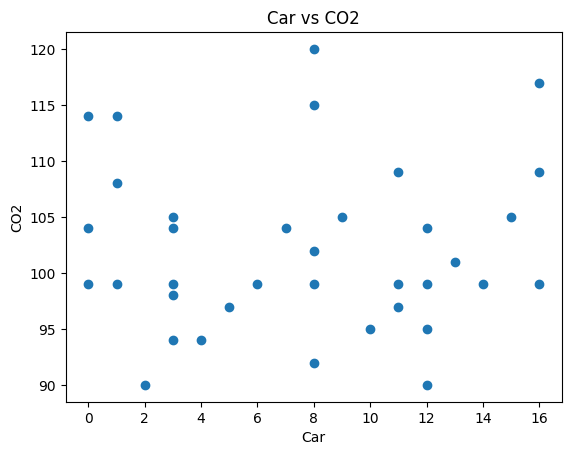

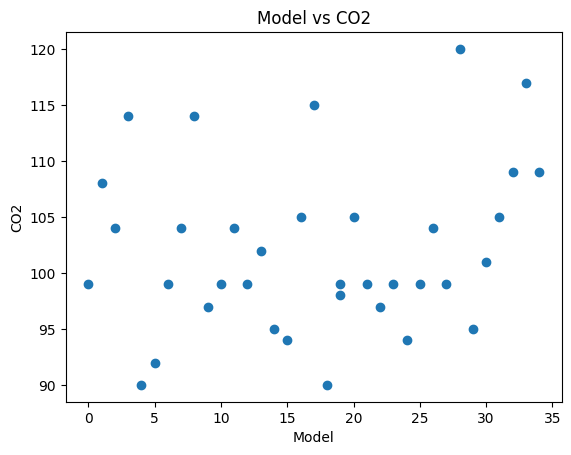

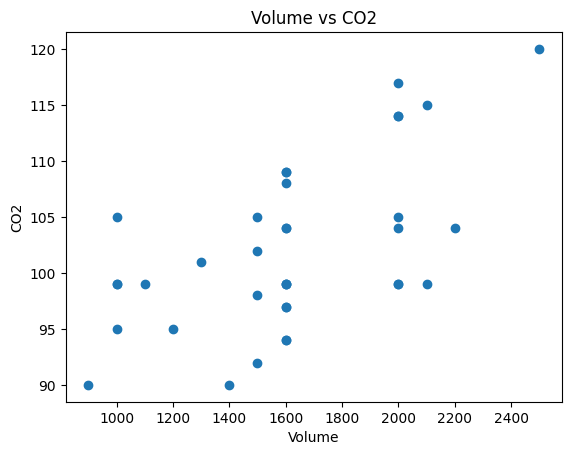

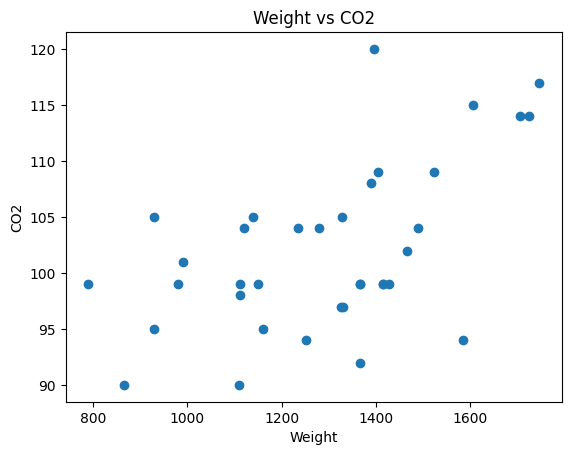

In [18]:
plt.scatter(df1['Car'],df1['CO2'])
plt.xlabel('Car')
plt.ylabel('CO2')
plt.title('Car vs CO2')
plt.show()

plt.scatter(df1['Model'],df1['CO2'])
plt.xlabel('Model')
plt.ylabel('CO2')
plt.title('Model vs CO2')
plt.show()

plt.scatter(df1['Volume'],df1['CO2'])
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.title('Volume vs CO2')
plt.show()

plt.scatter(df1['Weight'],df1['CO2'])
plt.xlabel('Weight')
plt.ylabel('CO2')
plt.title('Weight vs CO2')
plt.show()

**Segregating the Dataset into Input(x) and Output(y)**

In [22]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

**Splitting the Dataset into Training and Testing Data**

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x.shape, y.shape

((36, 4), (36,))

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28, 4), (8, 4), (28,), (8,))

**Loading the Models**

In [26]:
L1_Model = Lasso()
L2_Model = Ridge()

In [27]:
L1_Model

Lasso()

In [28]:
L2_Model

Ridge()

**Training the Models**

In [29]:
L1_Model.fit(x_train,y_train)

Lasso()

In [30]:
L2_Model.fit(x_train,y_train)

Ridge()

**Predicting the Result Using the Trained Models**

In [31]:
y1_pred = L1_Model.predict(x_test)
y1_pred

array([106.93150145, 101.0990967 , 104.48404393, 106.24899253,
       101.36548613, 107.52767057, 104.65396918,  97.37961345])

In [32]:
y2_pred = L2_Model.predict(x_test)
y2_pred

array([107.40934012, 101.37038416, 104.73810043, 106.14108714,
       101.28747667, 107.22074025, 104.59390712,  97.85116826])

**Calculating the Accuracy of the Trained Models**

In [34]:
r2_score(y_test,y1_pred)

0.3824126601744846

In [35]:
r2_score(y_test,y2_pred)

0.38610789809867285

**Predicting the Output of Single Test Data using the Trained Model**

In [37]:
x_test[6].shape

(4,)

In [39]:
x_test[6].reshape(1,4)

array([[  11,   23, 2000, 1428]])

In [40]:
L1_Model.predict(x_test[6].reshape(1,4))

array([104.65396918])

In [41]:
L2_Model.predict(x_test[6].reshape(1,4))

array([104.59390712])

In [42]:
y_test[6]

99

**Visualizing the Result**

**L1 Model**

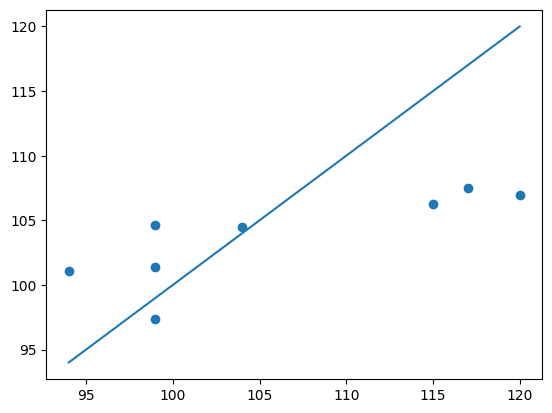

In [43]:
plt.scatter(y_test,y1_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])

**L2 Model**

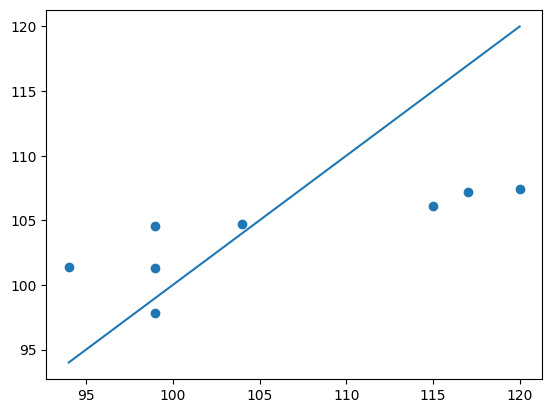

In [44]:
plt.scatter(y_test,y2_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])

**L1 and L2 Model**

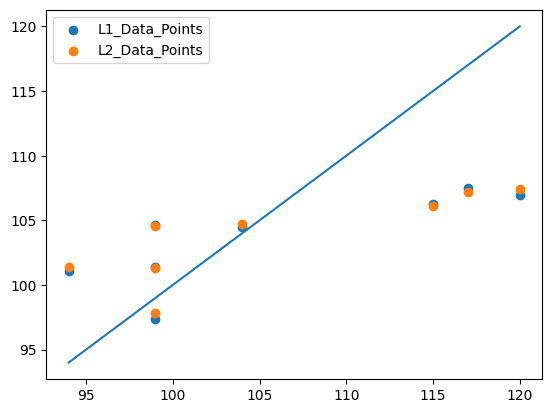

In [45]:
plt.scatter(y_test,y1_pred,label='L1_Data_Points')
plt.scatter(y_test,y2_pred,label='L2_Data_Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.legend()
plt.show()